# Titanic Survival Predictions With Desicion Trees

## by Michael Vasquez

# Introduction

On 15 April 1912, RMC Titanic struck an iceberg in the middle of a voyage from Southhampton to New York City. One thousand five hundred and three passengers passed away. The dataset from the titanic Kaggle competition is used to create three decision trees to classify if a passenger would survive or pass away based on a passenger's sex, age, family aboard the ship, fare, class of ticket, and port of embarkation. The first decision tree will be trained without any hyperparameters to check the model's performance. The following two trees will be tuned by adjusting specific hyperparameters and cost complexity pruning.

In [8]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree

# Dataset

The dataset was published on Kaggle and is part of the Titanic Kaggle competition. The dataset consists of three comma-separated values files: train, test, and gender_submission. The complete dataset contains information on 1309 passengers who were aboard the Titanic the day it sank. The dataset has twelve variables to develop a machine learning model to determine if a passenger would survive the incident.

### Load Data

In [9]:
os.chdir("C:\\Users\\mivul\\Downloads")
#Load csv with pandas
test_label = pd.read_csv("gender_submission.csv")
test_data = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

### Train Data

In [8]:
#Print training dataset information
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Test Data

In [9]:
#Print test dataset information
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


### Test Lables

In [10]:
#Print test label dataset information
print(test_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


## Data Description

The training dataset contains 891 entries and 12 columns. Values missing in the training dataset are 687 passenger cabin numbers, 177 age for passengers, and two passenger embarkation locations. Test and test label data set contain 418 entries. The test and test label datasets have 11 and 2 columns, respectively. Values missing in the test dataset are 327 passenger cabin numbers and 86 age for passengers. The test label has no missing values. The data types in the three datasets are floats, integers, and objects. 

### Description of Variables
Listed below are the tewlve variables provided to determine if a passenger would have survived the incident.

- PassengerId: The order of the listed passenger in the dataset
- Survived: Indicates if the passenger survived the incident:
  - Survived = 1
  - Passed away = 0
- Pclass: The class of the passenger's ticket:
  - Class 1 = 1
  - Class 2 = 2
  - Class 3 = 3
- Name: Name of the passenger
- Sex: Sex of the passenger
- Age: Age of the passanger
- SibSp: Number of siblings or spouses aboard
- Parch: Number of parents or children aboard
- Ticket: Passenger ticket number
- Fare: The cost of the ticket
- Cabin: Passenger cabin number
- Embarked: Port of embarkation:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

## Data Cleaning

The three datasets were cleaned before introducing them to the decision tree model. The passenger identification number, name, ticket, and cabin columns were removed from all the datasets. Rows with missing values were dropped from the datasets, reducing the train and test datasets to 712 and 311 observations. The train and test dataset set the continuous variables to floats and categorical variables to objects. The female and male values in the sex column were changed to 0 and 1. Utilized one-hot encoding to convert the passenger class and embarked columns to binary. Due to the reduction in testing observations, conducted a semi-join filter of the test label dataset to keep the appropriate labels for the test data. 

### Train Data Prep

In [10]:
#Remove the PassengerId, Name, Ticket, Cabin columns from the training dataset
train.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1, inplace=True)

#Remove rows with missing values from the training dataset
train.dropna(inplace= True)

#convert male and female values in the sex column to 0 and 1 in the training dataset
train.loc[train.Sex == 'female','Sex']= 0
train.loc[train.Sex == 'male','Sex']= 1

#convert to data type of the columns to float and object respectively in the training dataset
train['SibSp'] = train['SibSp'].astype(float)
train['Parch'] = train['Parch'].astype(float)
train['Pclass'] = train['Pclass'].astype(object)

#Utilize get_dummies to 1 hot encode the categorical pclass and embrarked columns in the training dataset
x_train = pd.get_dummies(train, columns = ['Pclass', 'Embarked'])

#assign the survived column to the variable to create a training label dataset
y_train = x_train["Survived"]

#Remove the survived column from the the training dataset
x_train.drop('Survived', axis=1, inplace=True)

In [11]:
#Display first 5 entries and information
print(x_train.head())
print()
print(x_train.info())

  Sex   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0   1  22.0    1.0    0.0   7.2500         0         0         1           0   
1   0  38.0    1.0    0.0  71.2833         1         0         0           1   
2   0  26.0    0.0    0.0   7.9250         0         0         1           0   
3   0  35.0    1.0    0.0  53.1000         1         0         0           0   
4   1  35.0    0.0    0.0   8.0500         0         0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         712 non-null    object 
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    float64
 3   Parch       712 non-null    float64

In [12]:
#Display first 5 entries and number of entries
print(y_train.head())
print()
print(len(y_train))

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

712


### Test Data Prep

In [13]:
#Remove the PassengerId, Name, Ticket, Cabin columns from the test dataset
test_data.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)

#Remove rows with missing values from the training dataset
test_data.dropna(inplace= True)

#convert male and female values in the sex column to 0 and 1 in the test dataset
test_data.loc[test_data.Sex == 'female','Sex']= 0
test_data.loc[test_data.Sex == 'male','Sex']= 1


##convert to data type of the columns to float and object respectively in the test dataset
test_data['SibSp'] = test_data['SibSp'].astype(float)
test_data['Parch'] = test_data['Parch'].astype(float)
test_data['Pclass'] = test_data['Pclass'].astype(object)


#Utilize get_dummies to 1 hot encode the categorical pclass and embrarked columns in the test dataset
x_test = pd.get_dummies(test_data, columns = ['Pclass', 'Embarked'])

In [6]:
#Display first 5 entries and information
print(x_test.head())
print()
print(x_test.info())

   PassengerId Sex   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0          892   1  34.5    0.0    0.0   7.8292         0         0         1   
1          893   0  47.0    1.0    0.0   7.0000         0         0         1   
2          894   1  62.0    0.0    0.0   9.6875         0         1         0   
3          895   1  27.0    0.0    0.0   8.6625         0         0         1   
4          896   0  22.0    1.0    1.0  12.2875         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           1           0  
1           0           0           1  
2           0           1           0  
3           0           0           1  
4           0           0           1  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Sex          331 non-null    object 

### Test label Data Prep

In [14]:
#Perform an inner join to find common PassengerId between the test and test label dataset
semi_table = x_test.merge(test_label, on='PassengerId')

#Create a boolean series of the shared passenger ID in the test label dataset
in_both = test_label['PassengerId'].isin(semi_table['PassengerId'])

#Use boolean series to subset the test label dataset to keep the test label for the passengers in the test dataset
filtered_test_labels = test_label[in_both]

#assign the survived column to the variable to create a new test label dataset
y_test = filtered_test_labels ["Survived"]

#Remove the PassengerId column from the test dataset
x_test.drop('PassengerId', axis=1, inplace=True)

In [33]:
#Display first 5 entries and number of entries
print(y_test.head())
print()
print(len(y_test))

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

331


# Exploratory Data Analysis

The previous report showed a passenger's age to be a strong predictor if a passenger would survive the crash. The histogram displays the age distribution between the training and testing data. The distribution of ages is similar, meaning that the testing data represents the passengers in the training data.

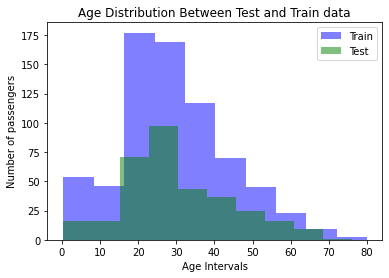

In [66]:
#create histogram for age distribution
fig, ax = plt.subplots()
ax.set_xlabel("Age Intervals")
ax.set_ylabel("Number of passengers")
ax.set_title("Age Distribution Between Test and Train data")
ax.hist(x_train["Age"], bins = 10, color= "b", label ='Train', alpha = 0.5)
ax.hist(x_test["Age"], bins = 10, color= "g", label ='Test', alpha = 0.5)
ax.legend()
plt.show()

The correlation matrix does not display a strong correlation between the continuous variables. The categorical variables do display stronger correlations. Collinearity between variables can skew predictions results, but decision trees are not susceptible to collinearity.

In [46]:
#create a correlation matrix from the training data
x_train.corr()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
Age,1.000000,-0.088679,-0.058506,0.337932,0.494446,-0.059983,-0.401545,0.185669,-0.016352,-0.163895
SibSp,-0.088679,1.000000,0.350736,0.151836,0.027483,-0.058999,0.027247,-0.045157,-0.078218,0.083968
Parch,-0.058506,0.350736,1.000000,0.246088,0.015667,-0.026107,0.008831,0.028491,-0.116345,0.035935
Fare,0.337932,0.151836,0.246088,1.000000,0.629563,-0.180853,-0.418244,0.357770,-0.122554,-0.266957
Pclass_1,0.494446,0.027483,0.015667,0.629563,1.000000,-0.390277,-0.572615,0.455627,-0.146481,-0.345124
Pclass_2,-0.059983,-0.058999,-0.026107,-0.180853,-0.390277,1.000000,-0.531332,-0.202772,-0.078213,0.230545
Pclass_3,-0.401545,0.027247,0.008831,-0.418244,-0.572615,-0.531332,1.000000,-0.238681,0.204425,0.112273
Embarked_C,0.185669,-0.045157,0.028491,0.357770,0.455627,-0.202772,-0.238681,1.000000,-0.153123,-0.847820
Embarked_Q,-0.016352,-0.078218,-0.116345,-0.122554,-0.146481,-0.078213,0.204425,-0.153123,1.000000,-0.394211
Embarked_S,-0.163895,0.083968,0.035935,-0.266957,-0.345124,0.230545,0.112273,-0.847820,-0.394211,1.000000


The two scatter plots show the passenger's age the fare price they paid to board the ship. The plots show a weak correlation between the variables, as confirmed in the correlation matrix. A majority of the passengers paid less than 100 pounds for their ticket. There are a couple of outliers, with passengers paying around 500 pounds for their ticket.

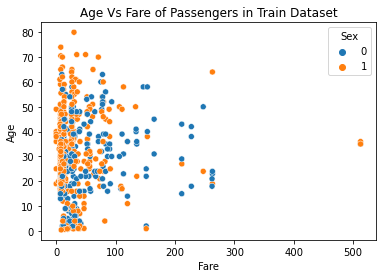

In [83]:
sns.scatterplot(data=x_train, x = "Fare", y= "Age", hue = "Sex").set(title='Age Vs Fare of Passengers in Train Dataset')
plt.show()

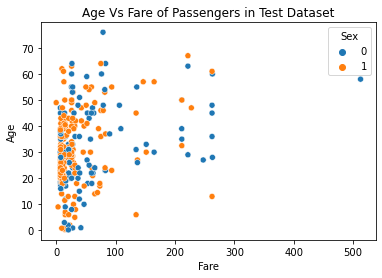

In [84]:
sns.scatterplot(data=x_test, x = "Fare", y= "Age", hue = "Sex").set(title='Age Vs Fare of Passengers in Test Dataset')
plt.show()

# Decision Tree Classification Experiment

A decision tree is a machine learning algorithm utilized to classify a dataset.  A decision tree will be utilized to predict if the passengers in the dataset would survive the sinking of the titanic. Hyperparameters are parameters set by a user that tune the model to improve performance and prevent overfitting. Overfitting occurs when the model learns details specific to the training data instead of general characteristics of the data to make better predictions on unseen data. The testing of different hyperparameters will be observed to create a good model.  The Mathews correlation coefficient is used to judge the model's overall performance. The Mathews correlation coefficient is a score between 0 to 1, with a higher score being better, calculated using all the values from a confusion matrix. The prediction values are also used to calculate the recall and precision of the model. True positive rate (TPR) and true negative rate (TNR) are related to the recall of the model. Positive predictive value (PPV) and negative predictive value (NPV) values are related to the precision of the model. A confusion matrix is a 2x2 graph that displays the correct and incorrect predictions made by the model. Correct predictions are recorded as true negative and true positive. Incorrect predictions are recorded as false negative and false positive. 

## Initial Decision Tree

The initial decision tree model will be providing a base for comparison for the following models. It is trained to the training data and assessed with testing data. The model has no hyperparameters. 

Accuracy:0.7492447129909365
Matthews correlation coefficient:0.4775636283658048


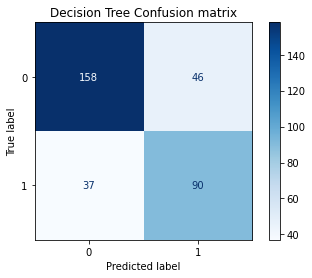

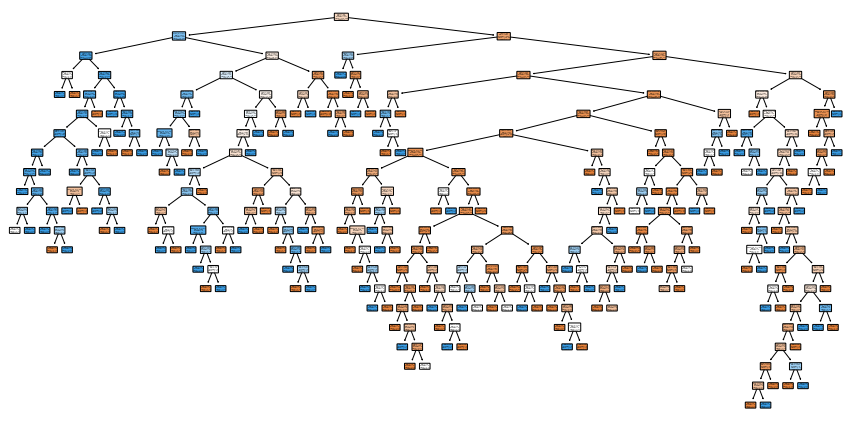

In [15]:
#Initialize model
model=DecisionTreeClassifier(random_state = 0)

#Fit training data to model
model.fit(x_train, y_train)

#Store classification predictions from the model
y_predict=model.predict(x_test)

#Asses the model
print(f"Accuracy:{model.score(x_test,y_test)}")
print(f"Matthews correlation coefficient:{matthews_corrcoef(y_test,y_predict)}")

#plot the confusion matrix for the results
matrix = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Decision Tree Confusion matrix')
plt.show(matrix)

#set the size of the display of the decsicion tree
plt.figure(figsize = (15, 7.5))

#plot the decsicion tree
tree.plot_tree(model, filled = True, class_names = ["0","1"], feature_names=x_train.columns, rounded = True)
plt.show()

### Results

- TPR = 0.774509803922
- TNR = 0.708661417323
- PPV = 0.810256410256
- NPV = 0.661764705882

The initial model has accuracy and MCC with values of 0.7492447129909365 and 0.4775636283658048, respectively.   It labeled 77% of passengers who passed away correctly with a positive predictive value of about 81%. Survivors were labeled correctly 71% of the time with a negative predictive value of about 66%. 

## Adjust Hyperparameters

The second decision tree is tuned by adjusting the hyperparameters. GridSearchCV is used to conduct a search for an ideal set of hyperparameters. GridSearchCV tries different combinations of provided parameters and attempts to find the best setting for the model. GridSearchCV is set to conduct ten-fold cross-validation. The hyperparameters being tuned are
- the max depth of the tree
- minimum number of samples required to split a leaf
- minimum number of samples that can be a leaf
- function to measure the quality of a split
- the number of features to consider conducting a split

In [34]:
#Initialize model
model_2 = DecisionTreeClassifier(random_state = 0)

#create a dictionary to find hpyerparameters for the model
tree_param1 = {"max_depth" : range(2,25),
             "criterion" : ("gini", "entropy"),
             "max_features" : ("auto", "sqrt", "log2"),
             "min_samples_split" : range(6,10),
             "min_samples_leaf" : range(1,5)}

#Use GridSearchCV to set hyperparameter with 10 cross validation
adjusted_hyperparameter_model = GridSearchCV(model_2, param_grid = tree_param1, cv = 10, verbose = False)

#Fit training data to model
adjusted_hyperparameter_model.fit(x_train, y_train)

print(adjusted_hyperparameter_model.best_estimator_)

DecisionTreeClassifier(max_depth=16, max_features='auto', min_samples_leaf=3,
                       min_samples_split=8, random_state=0)


Accuracy:0.8126888217522659
Matthews correlation coefficient:0.5999826503334023


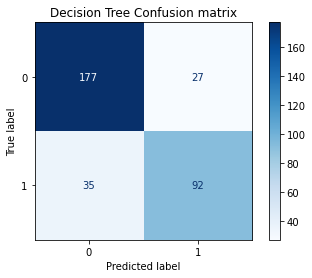

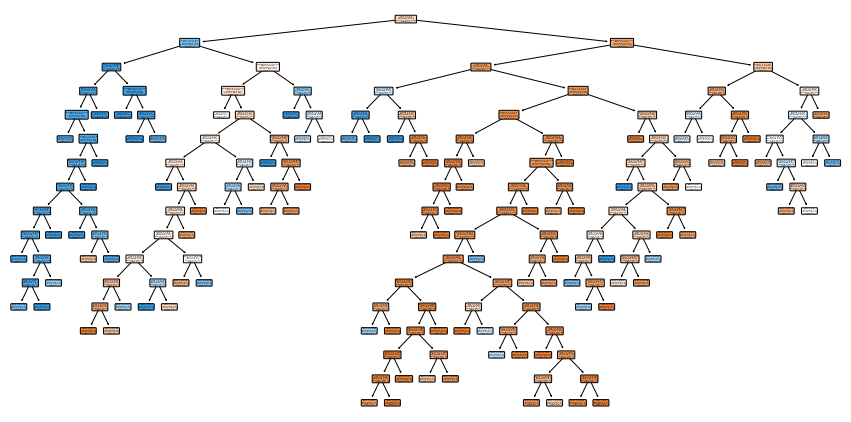

In [36]:
#Store classification predictions from the model
y_predict=adjusted_hyperparameter_model.predict(x_test)
 
#Asses the model
print(f"Accuracy:{adjusted_hyperparameter_model.score(x_test,y_test)}")
print(f"Matthews correlation coefficient:{matthews_corrcoef(y_test,y_predict)}")

#plot the confusion matrix for the results
matrix = plot_confusion_matrix(adjusted_hyperparameter_model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Decision Tree Confusion matrix')
plt.show(matrix)

#set the size of the display of the decsicion tree
plt.figure(figsize = (15, 7.5))

#plot the decsicion tree
tree.plot_tree(adjusted_hyperparameter_model.best_estimator_, filled = True, class_names = ["0","1"], feature_names=x_train.columns,
               rounded = True)
plt.show()

### Results

- TPR = 0.867647058824
- TNR = 0.724409448819
- PPV = 0.834905660377
- NPV = 0.773109243697

The model's improved accuracy and MCC values are 0.8126888217522659 and 0.5999826503334023, respectively. The addition of hyperparameters in the model increased the performance. It labeled 87% of passengers who passed away correctly with a positive predictive value of about 83%. Survivors were labeled correctly 72% of the time with a negative predictive value of about 77%. The model is well balanced, correctly labeling passengers. The matrix shows that the precision in the labeling of passengers with an average of 80%.

## Cost Complexity Pruning

Cost complexity pruning is an algorithm to remove leaves from a decision tree to reduce overfitting. The algorithm finds an ideal decision tree by finding a tree that has the lowest tree score. The tree score is calculated by adding the total sum of squared residuals of the leaves to the product of the tree complexity penalty and alpha tuning parameter. The sum of squared residuals is the difference between a data point value and the calculated prediction of the model. The tree complexity penalty is the number of leaves a tree has. Alpha is a parameter calculated by pruning leaves from a  tree containing the whole dataset. A series of Alpha values are calculated from the continuous pruning of the whole tree into subtrees. The values were acquired through the cost_complexity_pruning_path method in sklearn. GridSearchCV was used to find the best performing alpha using ten-fold cross-validation.

In [43]:
#Initiate model
model_3 = DecisionTreeClassifier(random_state = 0)

#Aquire dictionary with arrays for alpha and impurity values
path = model_3.cost_complexity_pruning_path(x_train,y_train)

#subsest the alpha values from the dictionary
ccp_alphas = path.ccp_alphas

#remove the alpha value for the full sized tree
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas)

[0.         0.00023408 0.0002809  0.00043979 0.00046816 0.00046816
 0.00046816 0.00057457 0.00068097 0.00069799 0.00076521 0.00080257
 0.00083229 0.00086185 0.00087394 0.00092557 0.00093633 0.00093633
 0.00093633 0.0010099  0.00104982 0.00105337 0.00105337 0.00108347
 0.0011236  0.0011236  0.00117041 0.00117041 0.00120385 0.00124775
 0.00124844 0.00125948 0.00126404 0.00132647 0.00132647 0.00133761
 0.00134083 0.00140449 0.00143528 0.00145851 0.00146301 0.0015565
 0.00179775 0.00187266 0.00190861 0.00193118 0.00196337 0.0020315
 0.0021949  0.00233743 0.00240409 0.0024077  0.00250803 0.00259127
 0.00265207 0.00268797 0.00302331 0.00343133 0.00444328 0.00481421
 0.00486608 0.00910329 0.01248439 0.01509673 0.01515299 0.04033178]


In [26]:
#initialize an empty list
models = []

#Create a model with each alpha in the array ccp_alphas and append models to the empty list labeled models 
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 0, ccp_alpha= ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

In [27]:
#Create a list of train and test scores for each model in the list models
train_scores = [model.score(x_train, y_train) for model in models]
test_scores = [model.score(x_test, y_test) for model in models]

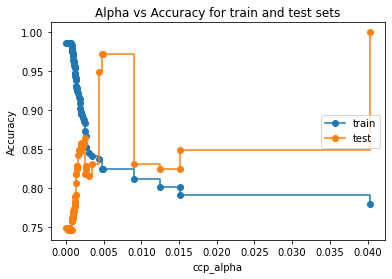

In [28]:
#Plot the alpha vs accuracy chart
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha vs Accuracy for train and test sets")
ax.plot(ccp_alphas, train_scores, marker ='o', label = 'train', drawstyle= "steps-post")
ax.plot(ccp_alphas, test_scores, marker ='o', label = 'test', drawstyle= "steps-post")
ax.legend()
plt.show()

The graph displays the model's accuracy of fitting the training and testing datasets.  The model's accuracy is on the y-axis, and the alpha value of the model is on the x-axis. The performance for each dataset is shown as blue and orange lines. When the two lines overlap, it demonstrates the best performance for both datasets. The superior alpha value is between 0 and 0.005.

In [31]:
#create a dictionary of alpha parameters for GridSearchCV
tree_param2 = {"ccp_alpha" : ccp_alphas}

#Use GridSearchCV to find the best performing alpha value
adjusted_ccp_model=GridSearchCV(model_3, param_grid = tree_param2, cv = 10, verbose = False)
#fit training data to the model
adjusted_ccp_model.fit(x_train, y_train)

#Print to view the model
print(adjusted_ccp_model.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.009103288529921642, random_state=0)


Accuracy:0.8308157099697885
Matthews correlation coefficient:0.6472069125185792


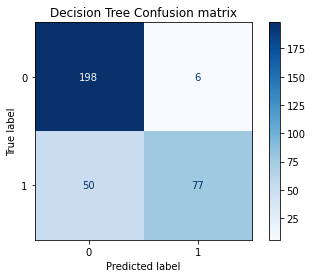

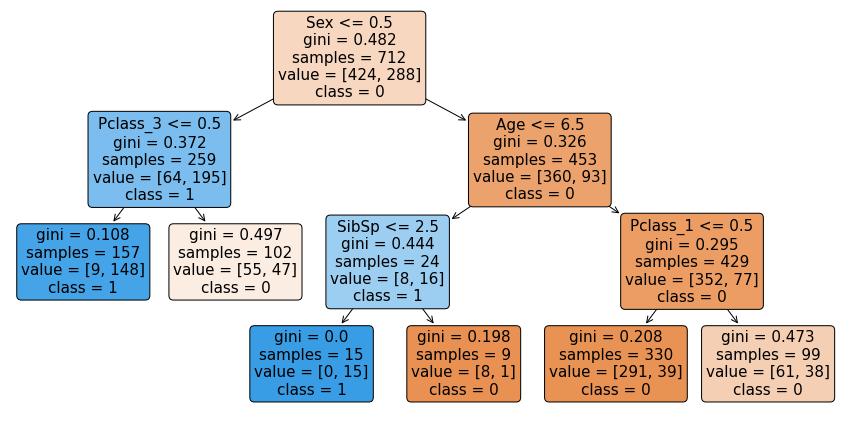

In [23]:
#Store classification predictions from the model
y_predict=adjusted_ccp_model.predict(x_test)

#Assess the model
print(f"Accuracy:{adjusted_ccp_model.score(x_test,y_test)}")
print(f"Matthews correlation coefficient:{matthews_corrcoef(y_test,y_predict)}")

#Plot the confusion matrix for the results
matrix = plot_confusion_matrix(adjusted_ccp_model.best_estimator_, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Decision Tree Confusion matrix')
plt.show(matrix)
#Set the size of the display of the decsicion tree
plt.figure(figsize = (15, 7.5))

#Plot the decision tree
tree.plot_tree(adjusted_ccp_model, filled = True, class_names = ["0","1"], feature_names=x_train.columns, rounded = True)
plt.show()

### Results

- TPR = 0.970588235294
- TNR = 0.606299212598
- PPV = 0.798387096774
- NPV = 0.927710843373

The model has the highest accuracy and MCC with values of 0.8308157099697885 and 0.6472069125185792, respectively. It labeled 97% of passengers who passed away correctly with a positive predictive value of about 80%. Survivors were labeled correctly 61% of the time with a negative predictive value of about 93%. The improvement in the model is correlated with the improvements in the prediction of passengers who passed away. Even though the model had a lower score for correctly labeled survivors, the negative predictive value provides a high level of confidence that passengers labeled survivors are correct compared to the other two models.

# Conculsion

The improvement of the models was correlated with the improvements in the classification of passengers who passed away. All the models were better at categorizing deceased passengers over survivors. Tuning the initial model using hyperparameters and cost complexity pruning improved the overall model score, but more importantly, it improved its predictive value. A higher predictive value gives the model's results a higher confidence level. The cost complexity tree was the worst at categorizing survivors, but the predictive value for passengers labeled as survivors was 92%. Passengers labeled as survivors by the cost complexity tree have a higher probability of being correct. The tree with the adjusted hyperparameters only had a 77%  predictive value for passengers labeled as survivors. Implementing a tree with a depth of 3 would provide faster processing than a tree with a depth of 16. The cost complexity tree would be ideal if one had to choose between the two decision trees to classify the passengers because it offers the best score for precision and processing time. 

# Citation

Titanic - machine learning from disaster. Kaggle. (2012). Retrieved November 24, 2021, from https://www.kaggle.com/c/titanic/overview. 

Starmer, J. (2020, June 6). Decision trees in python from start to finish. YouTube. Retrieved November 27, 2021, from https://www.youtube.com/watch?v=q90UDEgYqeI. 